In [20]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy.optimize import curve_fit 
from help_function import *

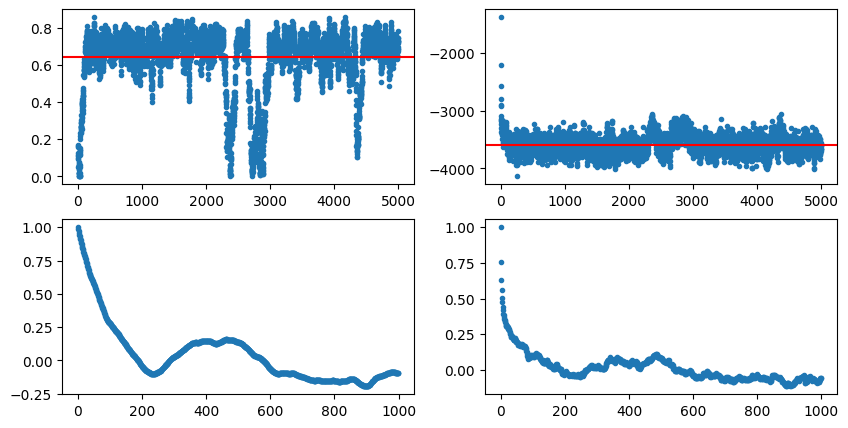

In [12]:
data = np.loadtxt("../data/analysis1.txt") # with initial phase, 5000 sweep
fig ,ax = plt.subplots(2,2, figsize=(10,5))
spin = data[:,0]
energy = data[:,1]
spin_mean = np.mean(spin[200:])
energy_mean = np.mean(energy[200:])
ax[0,0].plot(spin,'.',label= "Spin")
ax[0,0].axhline(spin_mean,c='r')
ax[0,1].plot(energy,'.',label ="Energie")
ax[0,1].axhline(energy_mean,c='r')
lag = 1000
ax[1,0].plot(autocorr_array(spin,lag),'.')
ax[1,1].plot(autocorr_array(energy,lag),'.')

plt.show()

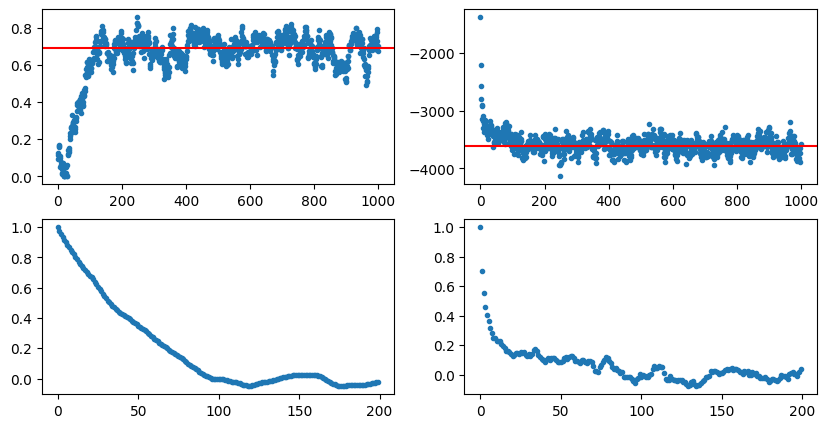

In [13]:
data = np.loadtxt("../data/analysis2.txt") # with initial phase, 1000 sweep
fig ,ax = plt.subplots(2,2, figsize=(10,5))
spin = data[:,0]
energy = data[:,1]
spin_mean = np.mean(spin[200:])
energy_mean = np.mean(energy[200:])

ax[0,0].plot(spin,'.',label= "Spin")
ax[0,0].axhline(spin_mean,c='r')
ax[0,1].plot(energy,'.',label ="Energie")
ax[0,1].axhline(energy_mean,c='r')
lag = 200
ax[1,0].plot(autocorr_array(spin,lag),'.')
ax[1,1].plot(autocorr_array(energy,lag),'.')

plt.show()

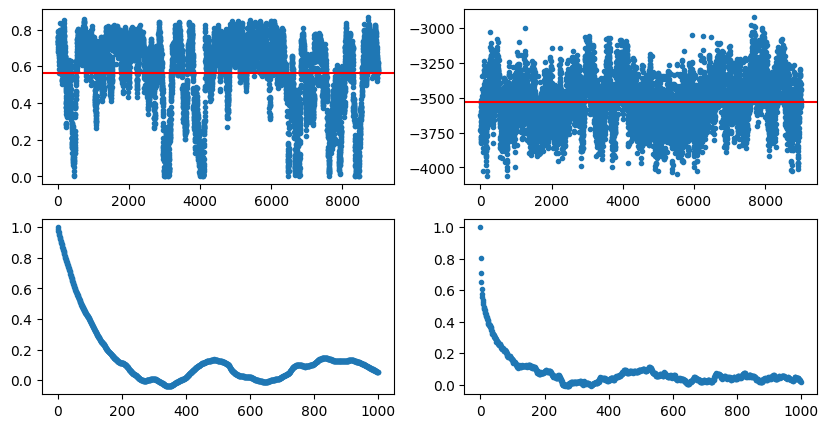

In [14]:
data = np.loadtxt("../data/analysis3.txt") # without initial phase, 10000 sweep after 1000 sweep ,near Tc
fig ,ax = plt.subplots(2,2, figsize=(10,5))
spin = data[:,0]
energy = data[:,1]
spin_mean = np.mean(spin)
energy_mean = np.mean(energy)

ax[0,0].plot(spin,'.',label= "Spin")
ax[0,0].axhline(spin_mean,c='r')
ax[0,1].plot(energy,'.',label ="Energie")
ax[0,1].axhline(energy_mean,c='r')
lag = 1000
ax[1,0].plot(autocorr_array(spin,lag),'.')
ax[1,1].plot(autocorr_array(energy,lag),'.')

plt.show()

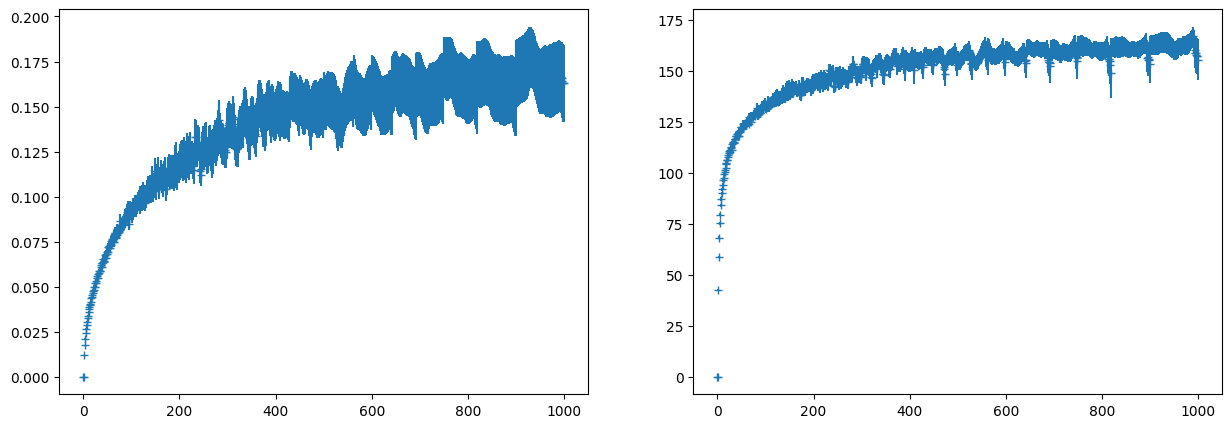

In [17]:
# Finde Blocklaenge
fig,ax = plt.subplots(1,2,figsize=(15,5))
length = 1000
x_1,y_1,y_err = data_blocking_error(spin,length)
ax[0].errorbar(x_1,y_1,yerr=y_err,fmt= '+',barsabove=True)
x_1,y_1,y_err = data_blocking_error(energy,length)
ax[1].errorbar(x_1,y_1,yerr=y_err,fmt= '+',barsabove=True)
plt.show()
     

        

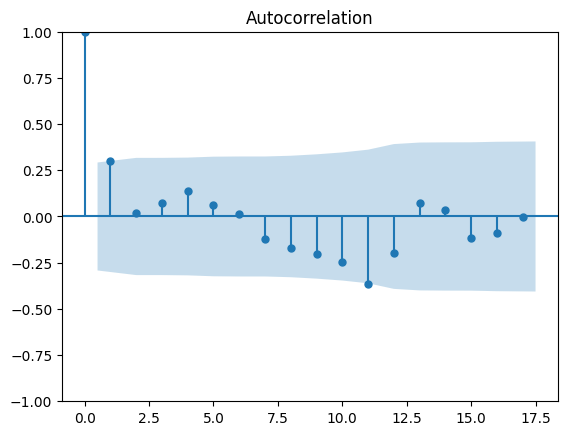

In [18]:
new_data = data_blocking(spin,200)
plot_acf(new_data)
plt.show()


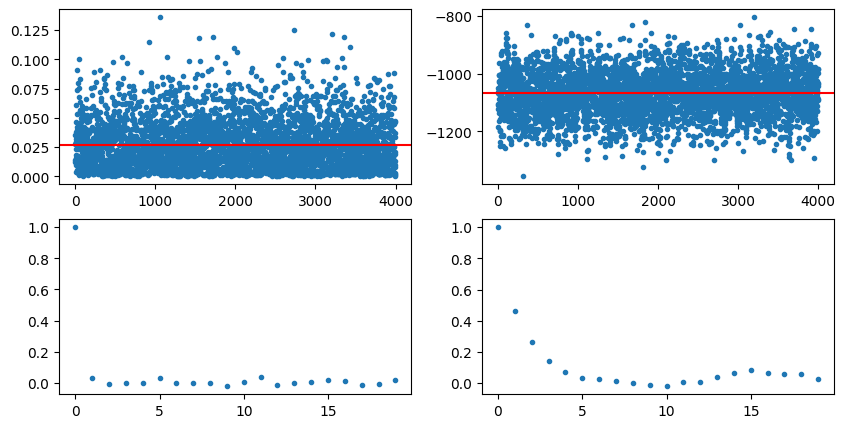

In [19]:
data = np.loadtxt("../data/analysis5.txt") 
# without initial phase, 5000 sweep after 1000 sweep, heigher temp
fig ,ax = plt.subplots(2,2, figsize=(10,5))
spin = data[:,0]
energy = data[:,1]
spin_mean = np.mean(spin)
energy_mean = np.mean(energy)

ax[0,0].plot(spin,'.',label= "Spin")
ax[0,0].axhline(spin_mean,c='r')
ax[0,1].plot(energy,'.',label ="Energie")
ax[0,1].axhline(energy_mean,c='r')
lag = 20
ax[1,0].plot(autocorr_array(spin,lag),'.')
ax[1,1].plot(autocorr_array(energy,lag),'.')
plt.show()

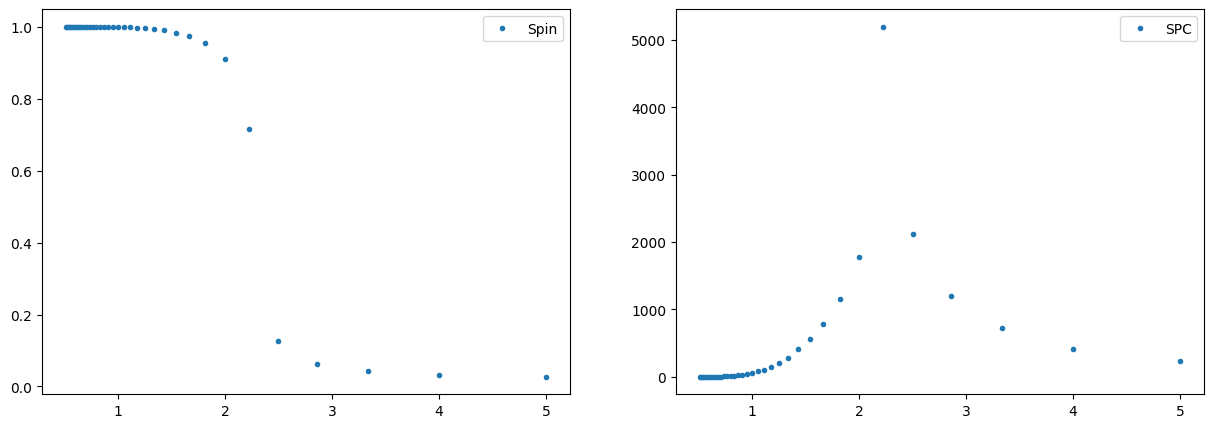

In [9]:
data = np.loadtxt("../data/analysis6.txt")
x_achse = data[:,0]
spin_mag = data[:,2]
spc_heat = data[:,1]
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(x_achse,spin_mag,'.',label='Spin')
ax[1].plot(x_achse,spc_heat,'.',label='SPC')

ax[0].legend()
ax[1].legend()
plt.show()


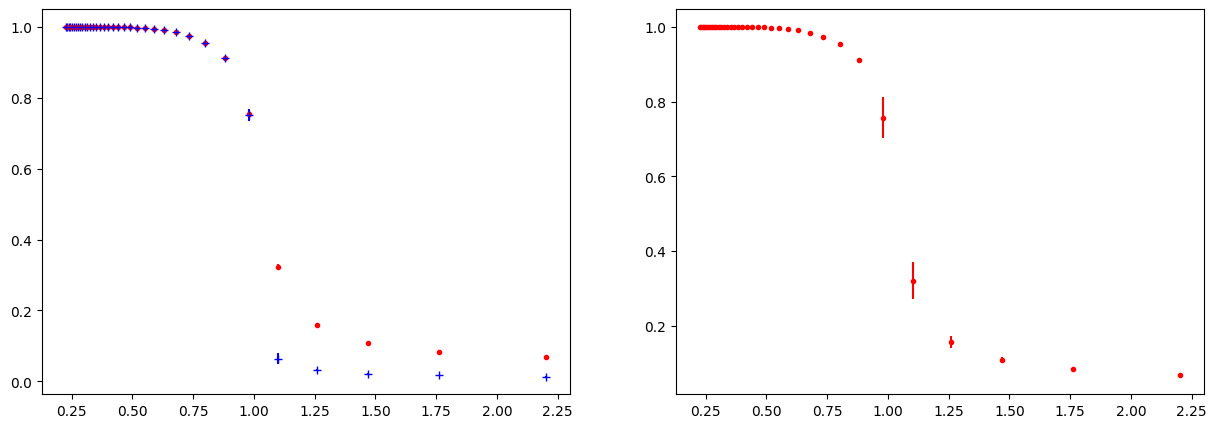

In [10]:
spin_simulation = np.loadtxt("../data/Spin_simulation1.txt").T
spin_simulation2 = np.loadtxt("../data/Spin_simulation2.txt").T

temp_dim = spin_simulation.shape[1]

fig, ax = plt.subplots(1,2,figsize=(15,5))
for i in range(temp_dim):
    x_achse = 1/spin_simulation[0,i]/2.27
    new_data = spin_simulation[1:,i]
    new_data_2 = spin_simulation2[1:,i]
    new_data = data_blocking(new_data,250)
    new_data_2 = data_blocking(new_data_2,250)
    new_data2 = np.array([]) 
    new_data2_2 = np.array([]) 
    for _ in range(1000): 
       new_data2 = np.append(new_data2,np.mean(bootstrap_data(new_data)))
       new_data2_2 = np.append(new_data_2,np.mean(bootstrap_data(new_data_2)))
    
    ax[0].errorbar(x_achse,np.mean(new_data2),yerr=np.std(new_data2), fmt='.',c='r')
    ax[0].errorbar(x_achse,np.mean(new_data2_2),yerr=np.std(new_data2_2), fmt='+',c='b')
    ax[1].errorbar(x_achse,np.mean(new_data),np.std(new_data), fmt ='.',c='r')
plt.show()


In [11]:
bootstrap = spin_simulation[1:,5]
bootstrap=data_blocking(bootstrap,500)
new_data2 = np.array([]) 
for _ in range(5000): 
    new_data2 = np.append(new_data2,np.mean(bootstrap_data(bootstrap)))

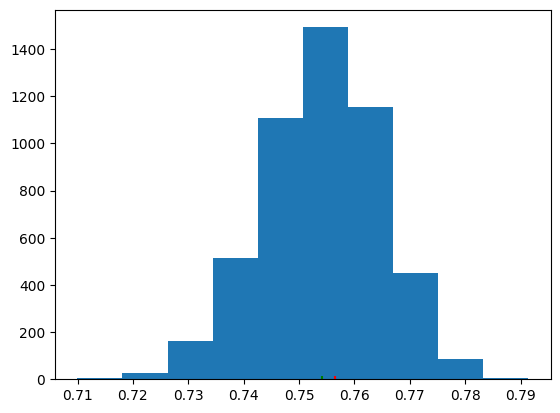

In [12]:
plt.hist(new_data2)
plt.vlines(np.mean(bootstrap),0,12,colors='r')
plt.vlines(np.mean(new_data2),0,12,colors='g')
plt.show()

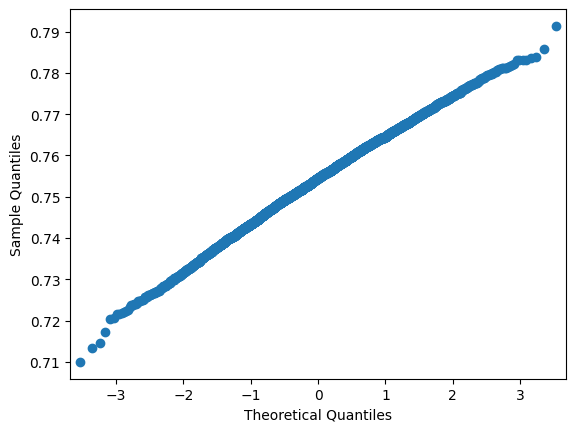

In [13]:
import statsmodels.api as sm 
import pylab as py

sm.qqplot(new_data2) 
py.show()

In [3]:
def spin_simulation_plot(spin_simulation,color='r',format='.',block_length=150,boot_length=500,label=None):
    temp_dim = spin_simulation.shape[1] 
    for i in range(temp_dim):
        x_achse = 1/spin_simulation[0,i]
        new_data = spin_simulation[1:,i]
        new_data = data_blocking(new_data,block_length)
        new_data2 = np.array([]) 
        for _ in range(boot_length): 
            new_data2 = np.append(new_data2,bootstrap_data(new_data))
        if(i<(temp_dim-1)):
            plt.errorbar(x_achse,np.mean(new_data2),yerr=np.std(new_data2),c=color,fmt=format)
        
        else:
            plt.errorbar(x_achse,np.mean(new_data2),yerr=np.std(new_data2),c=color,fmt=format,label=label)
        

    return

def binder_cum_plot(spin_simulation,color='r',format='.',block_length=None,boot_length=None,label=None):
    temp_dim = spin_simulation.shape[1]
    new_array = np.array([])
    for i in range(temp_dim):
        x_achse = 1/spin_simulation[0,i]
        new_data = spin_simulation[1:,i]
        if(i>=0):
            new_data = data_blocking(new_data,block_length)
            new_data2 = np.array([])
            for _ in range(block_length):
                new_data2 = np.append(new_data2,bootstrap_data(new_data))
        else:
            new_data2 = new_data
        y_data = binder_cummulanten(new_data2)
        binder_error = np.array([])
        for _ in range(boot_length):
            binder_error = np.append(binder_error,binder_cummulanten(bootstrap_data(new_data)))

        new_array = np.append(new_array,y_data)
        y_err = np.std(binder_error)
        if(i<(temp_dim-1)):
            plt.errorbar(x_achse,y_data,yerr=y_err,c=color,fmt=format)
        
        else:
            plt.errorbar(x_achse,y_data,yerr=y_err,c=color,fmt=format,label=label)
        
    return new_array

def specfic_heat_plot(spin_simulation,color='r',format='.',block_length=20,boot_length=2,label=None,L=1):
    temp_dim = spin_simulation.shape[1]
    new_array = np.array([])
    for i in range(temp_dim):
        x_achse = 1/spin_simulation[0,i]
        new_data = spin_simulation[1:,i]
        new_data = data_blocking(new_data,block_length)
        new_data2 = np.array([])
        for _ in range(boot_length): 
            new_data2 = np.append(new_data2,bootstrap_data(new_data))
        new_data2 = specific_heat(new_data2)
        new_data2 = new_data2*spin_simulation[0,i]**2/L**2
        new_array = np.append(new_array,new_data2)
        y_err = 0
        if(i<(temp_dim-1)):
            plt.errorbar(x_achse,new_data2,yerr=y_err,c=color,fmt=format)
        
        else:
            plt.errorbar(x_achse,new_data2,yerr=y_err,c=color,fmt=format,label=label)
        

    return new_array

def susceptibility_plot(spin_simulation,color='r',format='.',block_length=20,boot_length=2,label=None,L=1):
    temp_dim = spin_simulation.shape[1]
    new_array = np.array([])
    for i in range(temp_dim):
        x_achse = 1/spin_simulation[0,i]
        new_data = spin_simulation[1:,i]
        new_data = data_blocking(new_data,block_length)
        new_data2 = np.array([])
        for _ in range(boot_length): 
            new_data2 = np.append(new_data2,bootstrap_data(new_data))
        #new_data2 = np.mean(new_data2)
        #error = np.std(new_data2)
        new_data2 = specific_heat(new_data2)
        new_data2 = new_data2*spin_simulation[0,i]/L**2
        new_array = np.append(new_array,new_data2)
        y_err = 0
        if(i<(temp_dim-1)):
            plt.errorbar(x_achse,new_data2,yerr=y_err,c=color,fmt=format)
        
        else:
            plt.errorbar(x_achse,new_data2,yerr=y_err,c=color,fmt=format,label=label)
        

    return new_array





def onsager_soluttion(Beta):
    Tc = 2.27 
    temp = np.array([])
    for B in Beta:
        if(1/B>Tc):
            temp = np.append(temp,0)
        else:    
            temp = np.append(temp,(1-(np.sinh(2*B)**(-4)))**(1/8))
  
    return temp



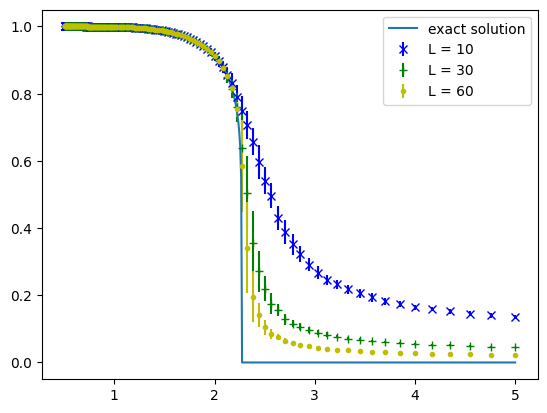

In [5]:
spin_simulation_1 = np.loadtxt("../data/Spin_L10.txt").T
spin_simulation_2 = np.loadtxt("../data/Spin_L20.txt").T
spin_simulation_3 = np.loadtxt("../data/Spin_L30.txt").T
spin_simulation_4 = np.loadtxt("../data/Spin_L40.txt").T
spin_simulation_5 = np.loadtxt("../data/Spin_L50.txt").T
spin_simulation_6 = np.loadtxt("../data/Spin_L60.txt").T
spin_simulation_7 = np.loadtxt("../data/Spin_L60.txt").T

length = 10
block = 250 
spin_simulation_plot(spin_simulation_1,block_length=block,boot_length=length,color='b',format='x',label="L = 10") 
spin_simulation_plot(spin_simulation_3,block_length=block,boot_length=length,color='g',format='+',label="L = 30")
spin_simulation_plot(spin_simulation_6,block_length=block,boot_length=length,color='y',format='.',label="L = 60")
 
Beta = np.linspace(0.2,2,1000)
x_achse = 1/Beta
y_achse = onsager_soluttion(Beta)
plt.plot(x_achse,y_achse,label='exact solution')
plt.legend()
plt.show()

In [4]:
spin_simulation_nearTc_1 = np.loadtxt("../data/Spin_nearTc_L10.txt").T
spin_simulation_nearTc_2 = np.loadtxt("../data/Spin_nearTc_L20.txt").T
spin_simulation_nearTc_3 = np.loadtxt("../data/Spin_nearTc_L30.txt").T
spin_simulation_nearTc_4 = np.loadtxt("../data/Spin_nearTc_L40.txt").T
spin_simulation_nearTc_5 = np.loadtxt("../data/Spin_nearTc_L50.txt").T
spin_simulation_nearTc_6 = np.loadtxt("../data/Spin_nearTc_L60.txt").T

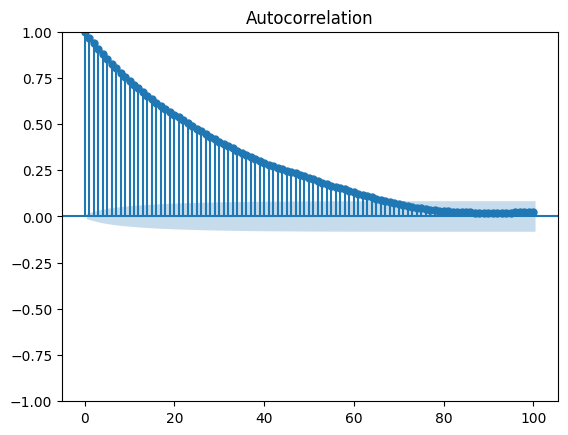

In [17]:
a = spin_simulation_3[1:,23]
plot_acf(a,lags=100)
plt.show()

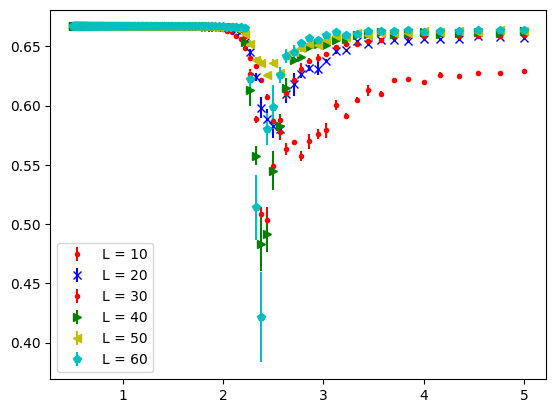

In [16]:
length = 5
L_1 = binder_cum_plot(spin_simulation_1,block_length=20,boot_length=length,color='r',format='.',label="L = 10")
L_2 = binder_cum_plot(spin_simulation_2,block_length=85,boot_length=length,color='b',format='x',label="L = 20")
L_3 = binder_cum_plot(spin_simulation_3,block_length=100,boot_length=length,color='r',format='.',label="L = 30")
L_4 = binder_cum_plot(spin_simulation_4,block_length=150,boot_length=length,color='g',format='>',label="L = 40")
L_5 = binder_cum_plot(spin_simulation_2,block_length=200,boot_length=length,color='y',format='<',label="L = 50")
L_6 = binder_cum_plot(spin_simulation_6,block_length=250,boot_length=length,color='c',format='p',label="L = 60")

plt.legend()
plt.show()

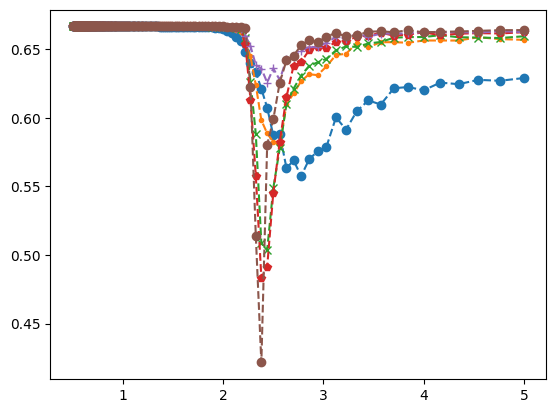

In [23]:
L = spin_simulation_1[0,:]
plt.plot(1/L,L_1,'o--')
plt.plot(1/L,L_2,'.--')
plt.plot(1/L,L_3,'x--')
plt.plot(1/L,L_4,'p--')
plt.plot(1/L,L_5,'+--')
plt.plot(1/L,L_6,'o--')
#plt.xlim(2.2,2.30)
#plt.ylim(0.45,0.67)
plt.show()

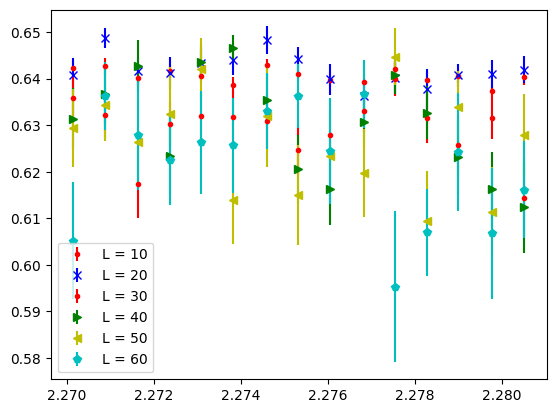

In [12]:
def linear_model(x,a,b):
    return a*x +b

length = 50
L_1 = binder_cum_plot(spin_simulation_nearTc_1,block_length=20,boot_length=length,color='r',format='.',label="L = 10")
L_2 = binder_cum_plot(spin_simulation_nearTc_2,block_length=85,boot_length=length,color='b',format='x',label="L = 20")
L_3 = binder_cum_plot(spin_simulation_nearTc_3,block_length=100,boot_length=length,color='r',format='.',label="L = 30")
L_4 = binder_cum_plot(spin_simulation_nearTc_4,block_length=150,boot_length=length,color='g',format='>',label="L = 40")
L_5 = binder_cum_plot(spin_simulation_nearTc_5,block_length=200,boot_length=length,color='y',format='<',label="L = 50")
L_6 = binder_cum_plot(spin_simulation_nearTc_6,block_length=250,boot_length=length,color='c',format='p',label="L = 60")

plt.legend()
plt.show()


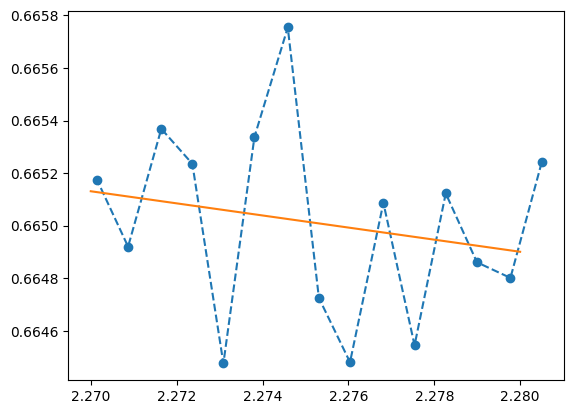

[-0.02301152  0.7173677 ]


In [33]:
x_data = spin_simulation_nearTc_1[0,:]
x_data = 1/x_data
plt.plot(x_data,L_1,'o--')
popt,pcov = curve_fit(linear_model,x_data,L_1)
x_data = np.linspace(2.27,2.28,1000)
plt.plot(x_data,linear_model(x_data,*popt))
plt.show()
print(popt)

In [34]:
def dU_dT(x_data,L_Vector):
    popt,_ = curve_fit(linear_model,x_data,L_Vector)
    return popt[0]

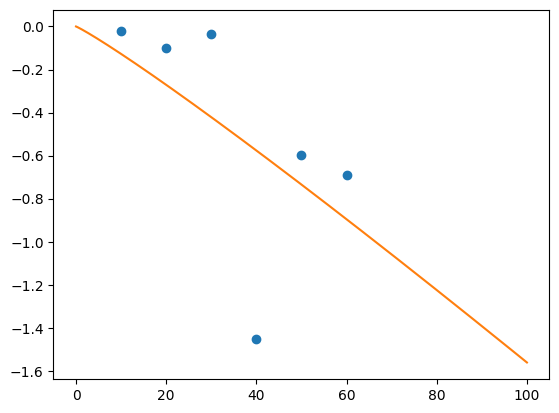

[-0.01042629  1.0876773 ]


In [35]:
def exponential_model(L,a,b):
    return a*L**b
x_data = spin_simulation_nearTc_1[0,:]
x_data = 1/x_data
L = np.linspace(10,60,6)
L_Vector = np.array([L_1,L_2,L_3,L_4,L_5,L_6])
du_dt = np.array([])
for i in range(len(L_Vector)):
    temp = dU_dT(x_data,L_Vector[i])
    du_dt = np.append(du_dt,temp)
x = np.linspace(0,100,1000)
popt,pcov = curve_fit(exponential_model,L,du_dt)
plt.plot(L,du_dt,'o')
plt.plot(x,exponential_model(x,*popt))
plt.show()
print(popt)

In [36]:
length = 500

def spin_sum_nearTc(Spin,block,boot):
    indx = Spin.shape[1]
    new_data2 = np.array([])
    for i in range(indx):
        new_data = Spin[1:,i]
        new_data = data_blocking(new_data,block)
        
        for _ in range(boot):
            new_data2 = np.append(new_data2,np.mean(bootstrap_data(new_data)))
   
    return np.mean(new_data2), np.std(new_data2)

L_1,L_error_1 = spin_sum_nearTc(spin_simulation_nearTc_1,500,500)
L_2,L_error_2 = spin_sum_nearTc(spin_simulation_nearTc_2,500,500)
L_3,L_error_3 = spin_sum_nearTc(spin_simulation_nearTc_3,500,500)
L_4,L_error_4 = spin_sum_nearTc(spin_simulation_nearTc_4,500,500)
L_5,L_error_5 = spin_sum_nearTc(spin_simulation_nearTc_5,500,500)
L_6,L_error_6 = spin_sum_nearTc(spin_simulation_nearTc_6,500,500)


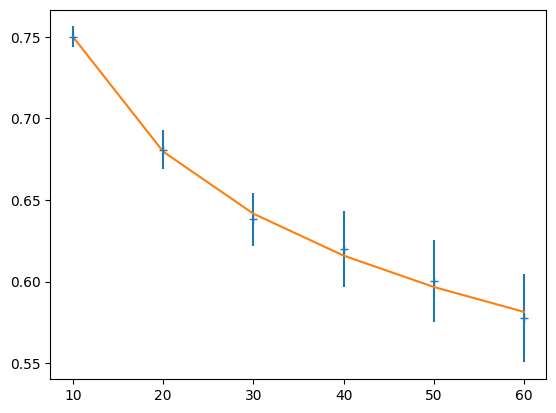

[ 1.04000747 -0.14202719]


In [37]:
L = np.linspace(10,60,6)
L_array = np.array([L_1,L_2,L_3,L_4,L_5,L_6])
L_array_err = np.array([L_error_1,L_error_2,L_error_3,L_error_4,L_error_5,L_error_6])
plt.errorbar(L,L_array,yerr=L_array_err,fmt='+')
popt,pcov = curve_fit(exponential_model,L,L_array,sigma=L_array_err)
plt.plot(L,exponential_model(L,*popt))
plt.show()
print(popt)

In [38]:
def Sus(data,beta,L):
    tempo = (np.std(data))**2
    return tempo*beta/(L**2)

def susceptibility(spin_simulation,block_length=1,boot_length=2,label=None,L=1):
    temp_dim = spin_simulation.shape[1]
    new_array = np.array([])
    for i in range(temp_dim):
        new_data = spin_simulation[1:,i]
        temp = spin_simulation[0,i]
        new_data = data_blocking(new_data,block_length)
        for _ in range(boot_length): 
            new_array = np.append(new_array,Sus(bootstrap_data(new_data),temp,L))
        

    return new_array.mean(),new_array.std()

In [56]:
block = 1
length = 500
L_1,L_error_1 = susceptibility(spin_simulation_nearTc_1,block_length=20,boot_length=length, L = 10)
L_2,L_error_2 = susceptibility(spin_simulation_nearTc_2,block_length=50,boot_length=length, L = 20)
L_3,L_error_3 = susceptibility(spin_simulation_nearTc_3,block_length=100,boot_length=length, L = 30)
L_4,L_error_4 = susceptibility(spin_simulation_nearTc_4,block_length=200,boot_length=length, L = 40)
L_5,L_error_5 = susceptibility(spin_simulation_nearTc_5,block_length=300,boot_length=length, L = 50)
L_6,L_error_6 = susceptibility(spin_simulation_nearTc_6,block_length=400,boot_length=length, L = 60)


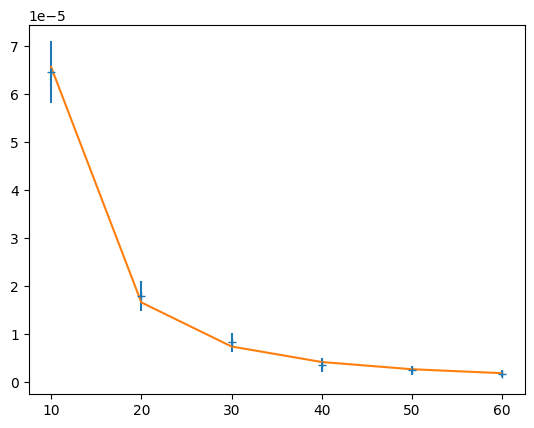

[ 0.00628505 -1.98116993]


In [57]:
L = np.linspace(10,60,6)
L_array = np.array([L_1,L_2,L_3,L_4,L_5,L_6])
L_array_err = np.array([L_error_1,L_error_2,L_error_3,L_error_4,L_error_5,L_error_6])
plt.errorbar(L,L_array,yerr=L_array_err,fmt='+')
popt,pcov = curve_fit(exponential_model,L,L_array,sigma=L_array_err)
plt.plot(L,exponential_model(L,*popt))
plt.show()
print(popt)

In [58]:
Energy_simulation_1 = np.loadtxt("../data/Energy_L10.txt").T
Energy_simulation_2 = np.loadtxt("../data/Energy_L20.txt").T
Energy_simulation_3 = np.loadtxt("../data/Energy_L30.txt").T
Energy_simulation_4 = np.loadtxt("../data/Energy_L40.txt").T
Energy_simulation_5 = np.loadtxt("../data/Energy_L50.txt").T
Energy_simulation_6 = np.loadtxt("../data/Energy_L60.txt").T

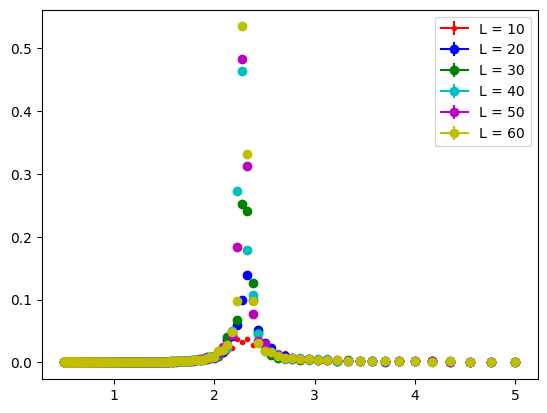

In [52]:
length = 250
block = 250
L_1 = specfic_heat_plot(Energy_simulation_1,block_length=block,boot_length=length,color='r',format='.-',label="L = 10", L = 10)
L_2 = specfic_heat_plot(Energy_simulation_2,block_length=block,boot_length=length,color='b',format='o-',label="L = 20", L = 20)
L_3 = specfic_heat_plot(Energy_simulation_3,block_length=block,boot_length=length,color='g',format='o-',label="L = 30", L = 30)
L_4 = specfic_heat_plot(Energy_simulation_4,block_length=block,boot_length=length,color='c',format='o-',label="L = 40", L = 40)
L_5 = specfic_heat_plot(Energy_simulation_5,block_length=block,boot_length=length,color='m',format='o-',label="L = 50", L = 50)
L_6 = specfic_heat_plot(Energy_simulation_6,block_length=block,boot_length=length,color='y',format='o-',label="L = 60", L = 60)

plt.legend()
plt.show()


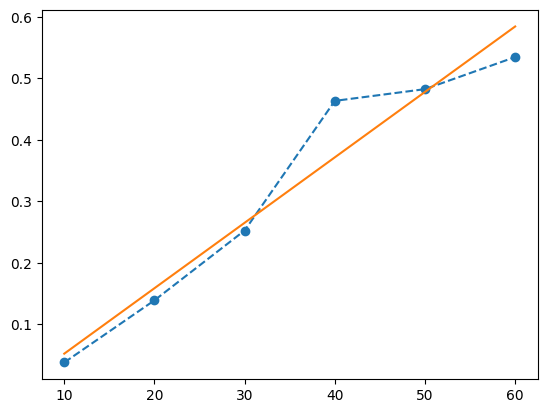

[ 0.01063885 -0.05405039]


In [53]:

L = np.linspace(10,60,6)
y = np.array([np.max(L_1),np.max(L_2),np.max(L_3),np.max(L_4),np.max(L_5),np.max(L_6)])
plt.plot(L,y,'o--')
popt,pcov = curve_fit(linear_model,L,y)
plt.plot(L,linear_model(L,*popt))
plt.show()
print(popt)


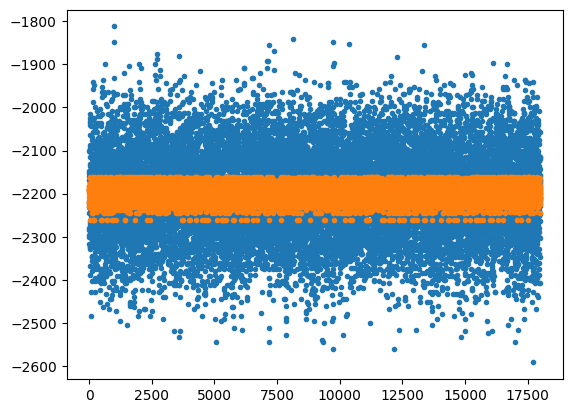

In [ ]:
energy=Energy_simulation_5[1:,15]
new_data = np.array([],dtype=np.float64)
a = data_blocking(energy,100)
for i in range(100):
    new_data = np.append(new_data,bootstrap_data(a))
plt.plot(energy,'.')
plt.plot(new_data,'.')
#plt.xlim(0,len(a)+10)
plt.show()

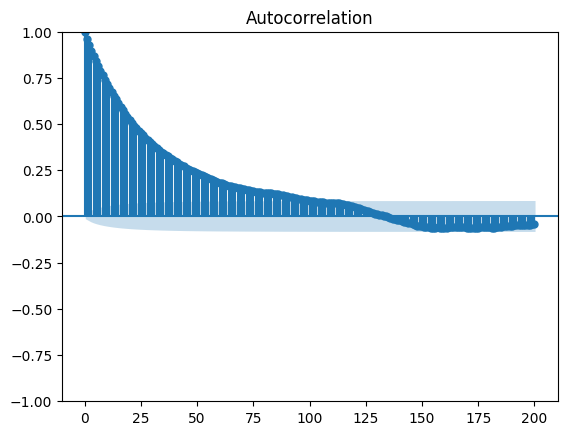

In [ ]:
#spin_simulation_1 = np.loadtxt("../data/sim_lol.txt").T
new_array = spin_simulation_nearTc_3[1:,5]
plot_acf(new_array,lags=200)
plt.show()

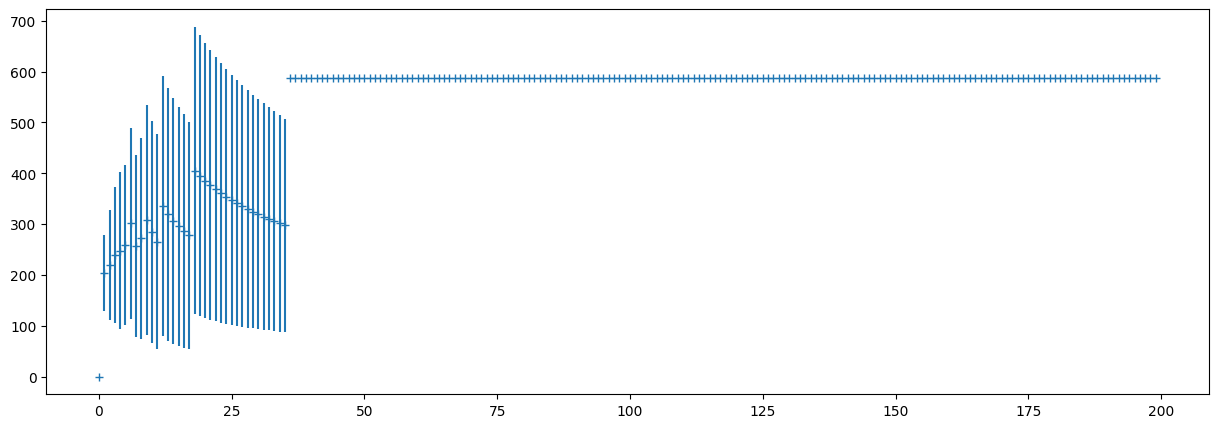

In [ ]:
# Finde Blocklaenge
fig,ax = plt.subplots(figsize=(15,5))
length = 200
x_1,y_1,y_err = data_blocking_error(data,length)
ax.errorbar(x_1,y_1,yerr=y_err,fmt= '+',barsabove=True)
plt.show()

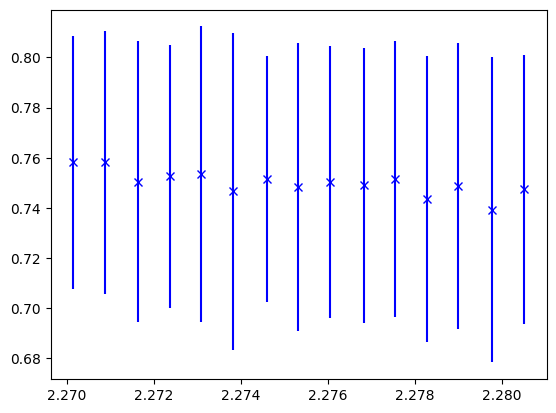

In [ ]:
block = 120
length = 120
spin_simulation_plot(spin_simulation_nearTc_1,block_length=block,boot_length=length,color='b',format='x',label="L = 10")
plt.show()


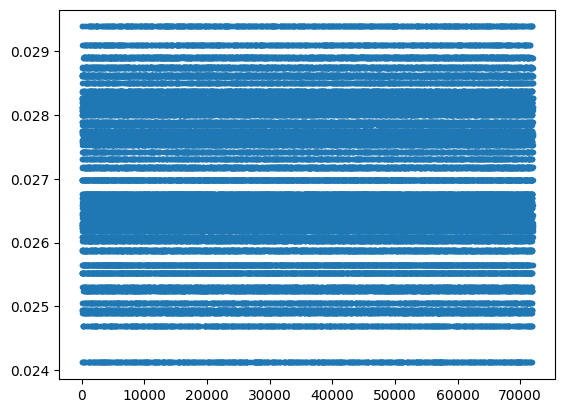

In [ ]:
data = spin_simulation_5[1:,0]
new_data = data_blocking(data,250)
new_array = np.array([])
for _ in range(1000):
    temp = bootstrap_data(new_data)
    new_array = np.append(new_array,temp)

plt.plot(new_array,'.')
plt.show()

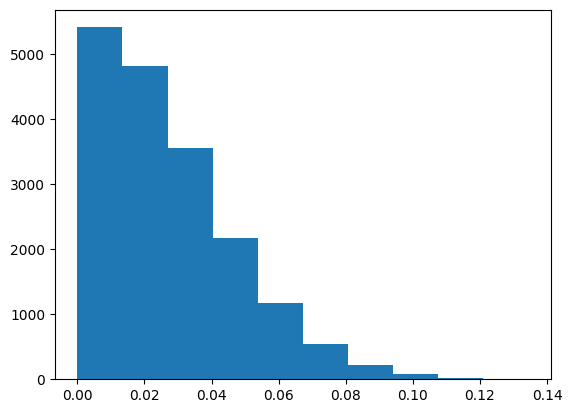

In [ ]:
plt.hist(data)
plt.show()

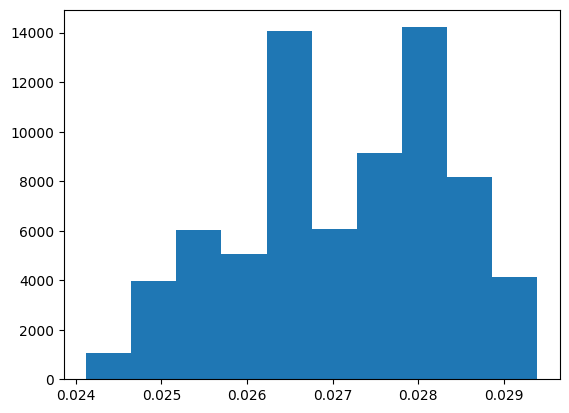

In [ ]:

plt.hist(new_array)
plt.show()

In [ ]:
print(binder_cummulanten(data),binder_cummulanten(new_array),binder_cummulanten(new_data),binder_cummulanten(rnd))

NameError: name 'rnd' is not defined

In [ ]:
print(new_array.mean(),new_data.mean(),data.mean())

0.0266105842 0.0266597 0.0266597


In [ ]:
rnd = np.abs(np.random.normal(0,0.05,10000))

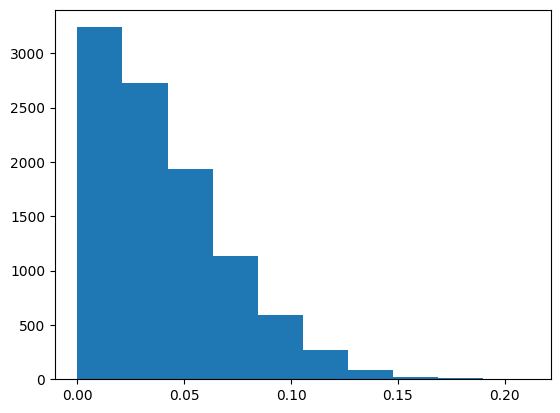

In [ ]:
plt.hist(rnd)
plt.show()

In [ ]:
len(spin_simulation_1[1:,1])

5000

In [ ]:
B = 0.2 
i = 0
while B <= 2:
    B +=0.01
    i +=1

In [ ]:
1/2.275

0.43956043956043955

In [ ]:
1/(2.280)

0.4385964912280702

In [ ]:
a = np.linspace(0.4385,0.4405,15).round(5)

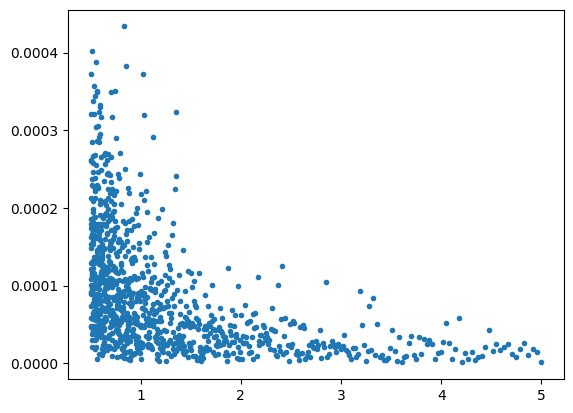

In [ ]:
x_achse = 1/Beta
y_achse = onsager_soluttion(Beta)
x = []
j = 0
for i in y_achse:
    normal = np.random.normal(i,0.01,5)
    temp = np.std(normal)**2*Beta[j]
    x.append(temp)
    j +=1
plt.plot(x_achse,x,'.')
plt.show()


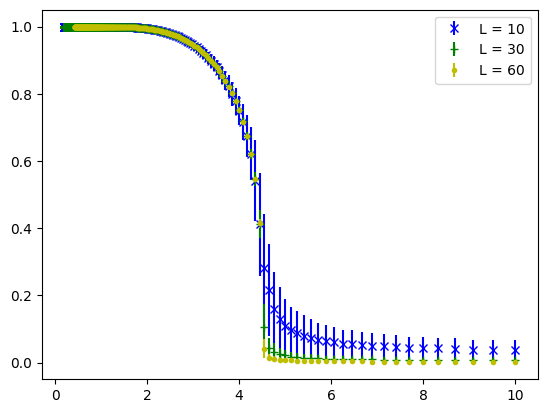

In [4]:
spin_simulation_1 = np.loadtxt("../data/Spin3D_L10.txt").T
spin_simulation_2 = np.loadtxt("../data/Spin3D_L20.txt").T
spin_simulation_3 = np.loadtxt("../data/Spin3D_L30.txt").T
spin_simulation_4 = np.loadtxt("../data/Spin3D_L40.txt").T
spin_simulation_5 = np.loadtxt("../data/Spin3D_L50.txt").T
spin_simulation_6 = np.loadtxt("../data/Spin3D_L60.txt").T

length = 1
block = 1 
spin_simulation_plot(spin_simulation_1,block_length=block,boot_length=length,color='b',format='x',label="L = 10") 
spin_simulation_plot(spin_simulation_3,block_length=block,boot_length=length,color='g',format='+',label="L = 30")
spin_simulation_plot(spin_simulation_6,block_length=block,boot_length=length,color='y',format='.',label="L = 60")
 
plt.legend()
plt.show()

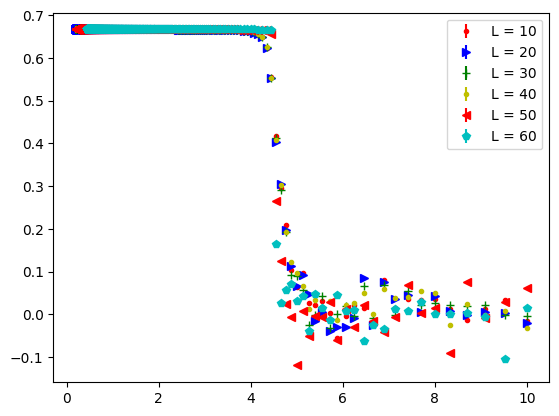

In [13]:
length = 1
L_1 = binder_cum_plot(spin_simulation_1,block_length=1,boot_length=length,color='r',format='.',label="L = 10")
L_2 = binder_cum_plot(spin_simulation_1,block_length=1,boot_length=length,color='b',format='>',label="L = 20")
L_3 = binder_cum_plot(spin_simulation_1,block_length=1,boot_length=length,color='g',format='+',label="L = 30")
L_4 = binder_cum_plot(spin_simulation_1,block_length=1,boot_length=length,color='y',format='.',label="L = 40")
L_5 = binder_cum_plot(spin_simulation_3,block_length=1,boot_length=length,color='r',format='<',label="L = 50")
L_6 = binder_cum_plot(spin_simulation_6,block_length=1,boot_length=length,color='c',format='p',label="L = 60")

plt.legend()
plt.show()

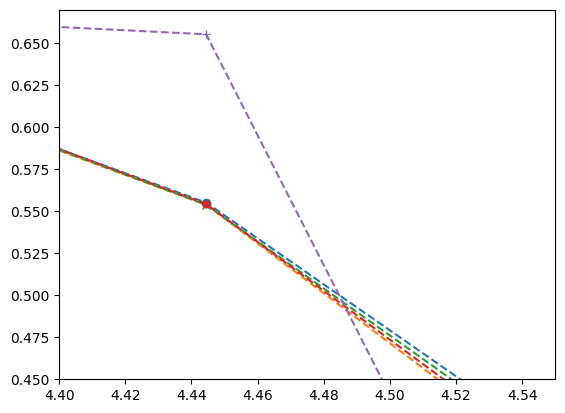

In [18]:
L = spin_simulation_1[0,:]
plt.plot(1/L,L_1,'o--')
plt.plot(1/L,L_2,'.--')
plt.plot(1/L,L_3,'x--')
plt.plot(1/L,L_4,'p--')
plt.plot(1/L,L_5,'+--')
plt.xlim(4.4,4.55)
plt.ylim(0.45,0.67)
plt.show()